In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_DICT = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
GOAL_STATE = (4, 4)
MAX_STEPS = 50

In [64]:
def is_valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

In [65]:
def step(state, action):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    if not is_valid_state(new_state):
        new_state = state # stay if move goes out of bounds
    reward = 10 if new_state == GOAL_STATE else 0
    done = (new_state == GOAL_STATE)
    return new_state, reward, done

In [66]:
def run_episode():
    state = (0, 0)
    total_reward = 0
    trajectory = [state]
    for step_num in range(MAX_STEPS):
        action = np.random.choice(ACTIONS) # Random policy
        next_state, reward, done = step(state, action)
        trajectory.append(next_state)
        total_reward += reward
        state = next_state
        if done:
            break
    return trajectory, total_reward

In [67]:
for ep in range(10):
    traj, reward = run_episode()
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")

Episode 1: Total Reward = 0, Steps = 51
Episode 2: Total Reward = 0, Steps = 51
Episode 3: Total Reward = 0, Steps = 51
Episode 4: Total Reward = 0, Steps = 51
Episode 5: Total Reward = 0, Steps = 51
Episode 6: Total Reward = 10, Steps = 21
Episode 7: Total Reward = 0, Steps = 51
Episode 8: Total Reward = 10, Steps = 20
Episode 9: Total Reward = 10, Steps = 37
Episode 10: Total Reward = 10, Steps = 18


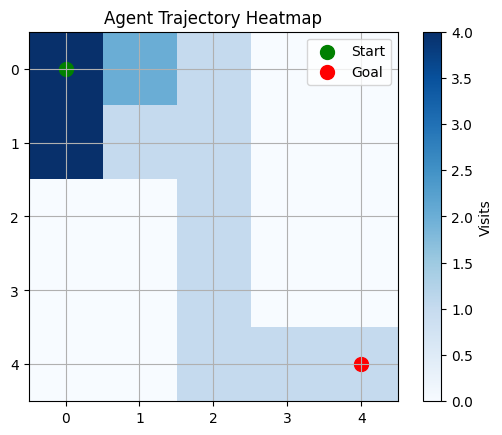

In [68]:
def plot_trajectory(trajectory):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for (x, y) in trajectory:
        grid[x, y] += 1
    plt.imshow(grid, cmap='Blues', origin='upper')
    plt.title("Agent Trajectory Heatmap")
    plt.colorbar(label="Visits")
    plt.scatter(0, 0, c='green', s=100, label='Start')
    plt.scatter(4, 4, c='red', s=100, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.show() 
plot_trajectory(traj)